# Scipy Tutorial

SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. It
adds significant power to the interactive Python session by providing the user with high-level commands and classes for
manipulating and visualizing data. 
SciPy contains additional routines needed in scientific work: for example, routines for computing integrals numerically, solving differential equations, optimization, and sparse matrices.


# Scipy Organization

SciPy is organized into subpackages covering different scientific computing domains. These are summarized in the
following table:


# Subpackage Description

cluster 

Clustering algorithms

constants 

Physical and mathematical constants

fftpack 

Fast Fourier Transform routines

integrate 

Integration and ordinary differential equation solvers

interpolate 

Interpolation and smoothing splines

io 

Input and Output

linalg 

Linear algebra

ndimage 

N-dimensional image processing

odr 

Orthogonal distance regression

optimize 

Optimization and root-finding routines

signal 

Signal processing

sparse 

Sparse matrices and associated routines

spatial 

Spatial data structures and algorithms

special

Special functions

stats 

Statistical distributions and functions

weave 

C/C++ integration

# Basic Script

In [1]:
import numpy as np
import scipy as sp

In [4]:
from scipy import linalg, optimize

Subpackages to be discussed:
cluster, fftpack, linalg, integrate, optimize, stats

# cluster

In [5]:
#Import modules

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.cluster import vq

#Create coordinates for battles for each year of the war

# create 100 coordinate pairs (i.e. two values), then add 5 to all of them
year_1 = np.random.randn(100, 2) + 5

# create 30 coordinatee pairs (i.e. two values), then subtract 5 to all of them
year_2 = np.random.randn(30, 2) - 5

# create 50 coordinatee pairs (i.e. two values)
year_3 = np.random.randn(50, 2)

#View the first 3 entries of each year of battles

print('year 1 battles:',  year_1[0:3])
print('year 2 battles:', year_2[0:3])
print('year 3 battles:', year_3[0:3])


year 1 battles: [[ 4.73119377  3.67234994]
 [ 5.96054828  4.63316258]
 [ 4.86921874  6.04403928]]
year 2 battles: [[-5.27719843 -5.38247924]
 [-4.71944784 -5.88866381]
 [-4.01053459 -3.48233893]]
year 3 battles: [[ 0.63755435  0.49482145]
 [ 1.21645304  0.79030372]
 [ 0.37670664  1.57485477]]


In [8]:
battles = np.vstack([year_1, year_2, year_3])
#Cluster the battle locations into three groups
# calculate the centroid coordinates of each cluster 
# and the variance of all the clusters
centroids, variance  = vq.kmeans(battles, 3)


In [12]:
#View the centroid coordinate for each of the three clusters
centroids

array([[-0.0854221 ,  0.13741049],
       [-4.9389711 , -5.00162921],
       [ 5.07306419,  4.88731289]])

In [13]:
#View the variance of the clusters (they all share the same)
variance

1.1810236563895851

# Seperate the battle data into clusters

In [14]:
identified, distance = vq.vq(battles, centroids)

# View the cluster of each battle

In [15]:
identified


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# View the distance of each individual battle from their cluster's centroid

In [16]:
distance

array([ 1.26214514,  0.92315784,  1.17455051,  1.66804068,  1.36711402,
        1.84202017,  0.46318556,  0.15615076,  0.4856378 ,  2.22356927,
        0.48421868,  0.32797755,  1.19634363,  1.13729645,  0.54903661,
        1.46277868,  0.44951477,  1.25436143,  1.37700919,  1.25088545,
        0.22223603,  0.12187436,  1.31664352,  1.58622611,  2.55732231,
        1.46810899,  0.95137118,  0.41105863,  0.62455189,  1.12652743,
        0.54001862,  2.89434737,  3.10967405,  0.76352712,  0.83570872,
        0.44751194,  0.39136895,  1.4600682 ,  0.74833971,  0.18528343,
        2.17787031,  1.98624179,  0.75695534,  1.07584451,  0.22696454,
        2.75032001,  1.61902899,  2.46959349,  0.71155949,  1.28355981,
        1.78163643,  1.71057949,  1.21358863,  0.38777345,  0.9003104 ,
        1.43324645,  2.33369235,  2.14858677,  1.61543386,  0.41500099,
        1.87213608,  0.14710691,  2.45063794,  0.75136163,  0.48520443,
        0.95272128,  2.43068095,  2.55792537,  1.26286686,  1.31

# Hierarchical Clustering

(150, 2)


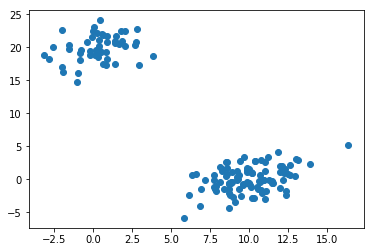

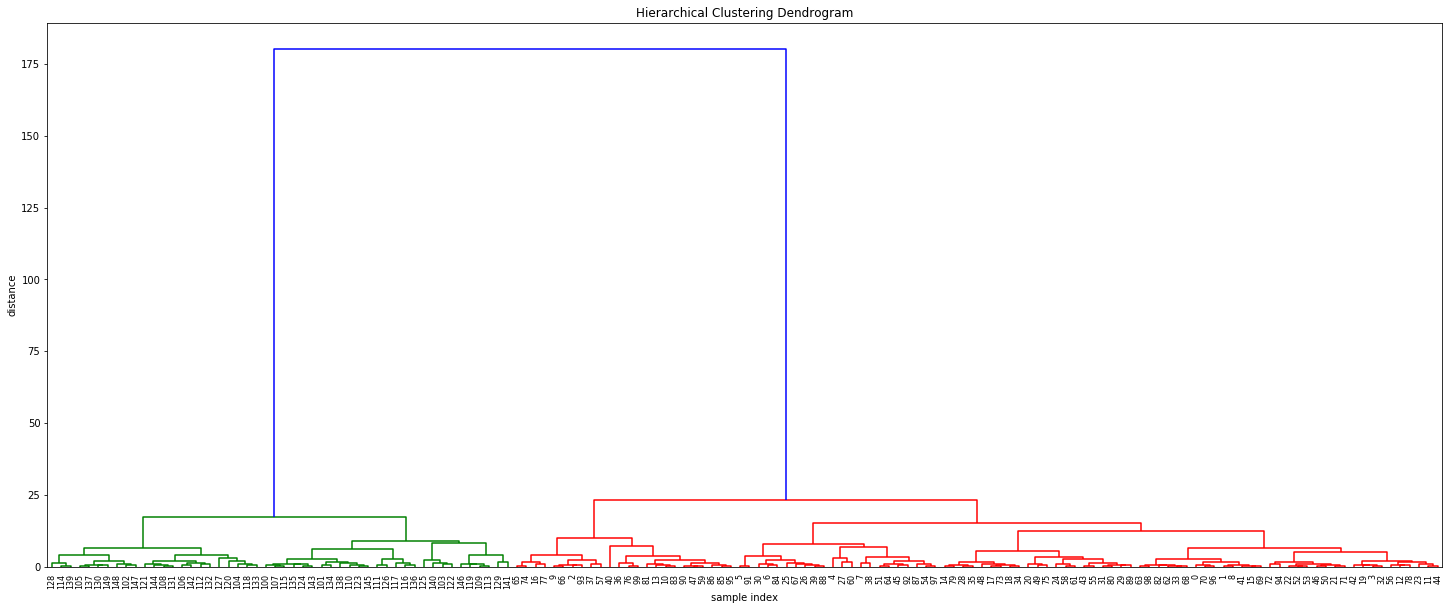

In [18]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print (X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()
# generate the linkage matrix
Z = linkage(X, 'ward')
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

# FFTPACK

Resource:https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html#one-dimensional-discrete-fourier-transforms

# LINALG

In [19]:
#scipy.linalg.inv
#Takes Inverse of a matrix
from scipy import linalg
a = np.array([[1., 2.], [3., 4.]])
linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

# scipy.linalg.solve
Solves the linear equation set a * x = b for the unknown x for square a matrix.

In [20]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
from scipy import linalg
x = linalg.solve(a, b)
x

array([ 2., -2.,  9.])

# scipy.linalg.eig
Solve an ordinary or generalized eigenvalue problem of a square matrix.

In [21]:
###Show PCA LAB

# scipy.linalg.svd

Singular Value Decomposition.

Factorizes the matrix a into two unitary matrices U and Vh, and a 1-D array s of singular values (real, non-negative) such that a == U @ S @ Vh, where S is a suitably shaped matrix of zeros with main diagonal s.

In [22]:
from scipy import linalg
m, n = 9, 6
a = np.random.randn(m, n) + 1.j*np.random.randn(m, n)
U, s, Vh = linalg.svd(a)
U.shape,  s.shape, Vh.shape
((9, 9), (6,), (6, 6))

((9, 9), (6,), (6, 6))

More Resource Available: https://docs.scipy.org/doc/scipy/reference/linalg.html

# INTEGRATE 

Resource: https://docs.scipy.org/doc/scipy/reference/integrate.html


# scipy.integrate.quad

Compute a definite integral.

Integrate func from a to b (possibly infinite interval) 

Example 1: Calculate ∫04x2dx and compare with an analytic result

In [25]:
from scipy import integrate
x2 = lambda x: x**2
integrate.quad(x2, 0, 4)

(21.333333333333336, 2.368475785867001e-13)

Example 2: Calculate Integral of (e^(-x))within limit of 0 to infinity

In [26]:
invexp = lambda x: np.exp(-x)
integrate.quad(invexp, 0, np.inf)

(1.0000000000000002, 5.842606996763696e-11)

# scipy.integrate.solve_ivp
Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential equations given an initial value:
dy / dt = f(t, y)

y(t0) = y0

Here t is a 1-dimensional independent variable (time), y(t) is an n-dimensional vector-valued function (state) and an n-dimensional vector-valued function f(t, y) determines the differential equations. The goal is to find y(t) approximately satisfying the differential equations, given an initial value y(t0)=y0.


    
    

In [27]:
#Example 1:Basic exponential decay showing automatically chosen time points.

from scipy.integrate import solve_ivp
def exponential_decay(t, y): return -0.5 * y
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8])
print(sol.t)
    
    

ImportError: cannot import name 'solve_ivp'

# Solving Ordinary Differential Equations
#Link: http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html

# OPTIMIZE

# MINIMIZATION WITH CONSTRAINTS EXAMPLE

In [78]:
import numpy as np
from scipy.optimize import minimize
def objective(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    return x1*x4*(x1+x2+x3)+x3
def constraint1(x):
        return x[0]*x[1]*x[2]*x[3]-25
def constraint2(x):
    sum_sq=40
    for i in range(4):
        sum_sq=sum_sq -x[i]**2
    return sum_sq

In [79]:
x0=[1,5,5,1]
print(objective(x0))

16


In [80]:
b=[1.0,5.0]
bnds=[b,b,b,b]
con1={'type':'ineq','fun':constraint1}
con2={'type':'eq','fun':constraint2}
cons=[con1,con2]
            

In [82]:
sol = minimize (objective, x0, method= 'SLSQP', bounds= bnds,constraints=cons)

In [83]:
print(sol)

     fun: 17.01401724563517
     jac: array([ 14.57227,   1.37941,   2.37941,   9.56415])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 1.     ,  4.743  ,  3.82115,  1.37941])


# Statistical functions (scipy.stats)

link:https://docs.scipy.org/doc/scipy/reference/stats.html

# scipy.stats.multivariate_normal

A multivariate normal random variable.

The mean keyword specifies the mean. The cov keyword specifies the covariance matrix.

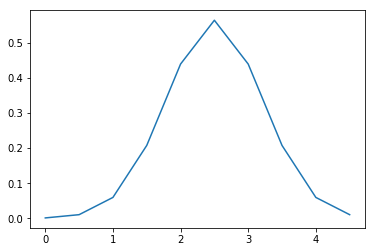

In [28]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5) 
y
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y)

In [30]:
#scipy.stats.describe
#Compute several descriptive statistics of the passed array.
from scipy import stats
a = np.arange(10)
stats.describe(a)




DescribeResult(nobs=10, minmax=(0, 9), mean=4.5, variance=9.1666666666666661, skewness=0.0, kurtosis=-1.2242424242424244)

In [31]:
b = [[1, 2], [3, 4]]
stats.describe(b)

DescribeResult(nobs=2, minmax=(array([1, 2]), array([3, 4])), mean=array([ 2.,  3.]), variance=array([ 2.,  2.]), skewness=array([ 0.,  0.]), kurtosis=array([-2., -2.]))

In [32]:
#scipy.stats.gmean
#Compute the geometric mean along the specified axis.
from scipy.stats import gmean
gmean([1, 4])



2.0

In [33]:
gmean([1, 2, 3, 4, 5, 6, 7])

3.3800151591412964

In [34]:
#scipy.stats.hmean
#Calculate the harmonic mean along the specified axis.

#That is: n / (1/x1 + 1/x2 + ... + 1/xn)

In [35]:
from scipy.stats import hmean
hmean([1, 4])

1.6000000000000001

In [36]:
hmean([1, 2, 3, 4, 5, 6, 7])

2.6997245179063363

In [37]:
#scipy.stats.kurtosis
#Compute the kurtosis (Fisher or Pearson) of a dataset.

#Kurtosis is the fourth central moment divided by the square of the variance. 


In [38]:
from scipy.stats import kurtosis
kurtosis([1, 2, 3, 4, 5])

-1.3

# scipy.stats.skew
Compute the skewness of a data set.

For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution.

In [53]:
from scipy.stats import skew
skew([1, 2, 3, 4, 5])

0.0

In [54]:
skew([2, 8, 0, 4, 1, 9, 9, 0])

0.2650554122698573

In [39]:
#scipy.stats.mode

#Return an array of the modal (most common) value in the passed array.

#If there is more than one such value, only the smallest is returned. The bin-count for the modal bins is also returned.

In [40]:
a = np.array([[6, 8, 3, 0],
...               [3, 2, 1, 7],
...               [8, 1, 8, 4],
...               [5, 3, 0, 5],
...               [4, 7, 5, 9]])
from scipy import stats
stats.mode(a)

ModeResult(mode=array([[3, 1, 0, 0]]), count=array([[1, 1, 1, 1]]))

In [41]:
#scipy.stats.pearsonr
#Calculate a Pearson correlation coefficient and the p-value for testing non-correlation.

In [43]:
from scipy import stats
a = np.array([0, 0, 0, 1, 1, 1, 1])
b = np.arange(7)
stats.pearsonr(a, b)

(0.8660254037844386, 0.011724811003954654)

In [44]:
stats.pearsonr([1,2,3,4,5], [5,6,7,8,7])

(0.83205029433784372, 0.080509573298498519)

In [45]:
#scipy.stats.linregress
#Calculate a linear least-squares regression for two sets of measurements

In [46]:
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(12345678)
x = np.random.random(10)
y = np.random.random(10)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [47]:
print("r-squared:", r_value**2)

r-squared: 0.080402268539


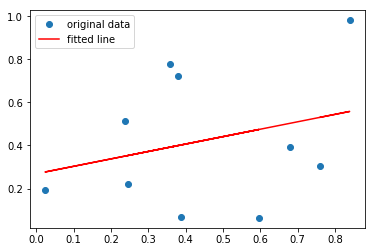

In [48]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

# scipy.stats.ttest_ind
Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [50]:
from scipy import stats
np.random.seed(12345678)
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=0.26833823296238857, pvalue=0.78849443369565098)

In [51]:
stats.ttest_ind(rvs1,rvs2, equal_var = False)

Ttest_indResult(statistic=0.26833823296238857, pvalue=0.78849452749501059)

# scipy.stats.chisquare
Calculate a one-way chi square test.

The chi square test tests the null hypothesis that the categorical data has the given frequencies.

In [52]:
from scipy.stats import chisquare
chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])

Power_divergenceResult(statistic=3.5, pvalue=0.62338762774958223)

# Bayes Theorem

See the separate Notebook